In [109]:
import numpy as np
from tqdm import tqdm
import timeit
from matplotlib import pyplot as plt
from Code import ULA
from Code import Algo1
from Code import ZVnbrosse

## Setup

In [71]:
dim = 1
h = 0.1
n = 1000
N_train = 50
N_test = 100
n_tilde = 70
deg = 2

def f(x):
    a = 1 / np.sqrt(2)
    return 1/2 * (x-2*a)**2 - 5/2 * np.log(1 + np.exp(-2 * x * a))
    
def f_grad(x):
    a = 1 / np.sqrt(2)
    return x-2*a+5*a/(1 + np.exp(2* (x * a)))

def local_weighted_estimator(X):
    return X.sum(axis=1).mean()

def estimator(XX):
    Pi = np.empty(XX.shape[0])
    for i in tqdm(range(XX.shape[0])):
        Pi[i] = local_weighted_estimator(XX[i])
    return Pi

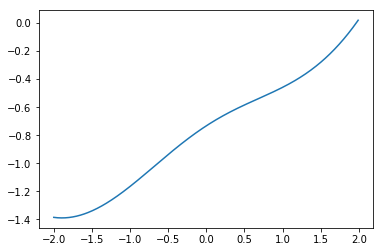

In [78]:
t = np.arange(-0.5, 0.5, 0.01)
s = np.array(list(map(f, t)))

plt.plot(t, s)
plt.show()

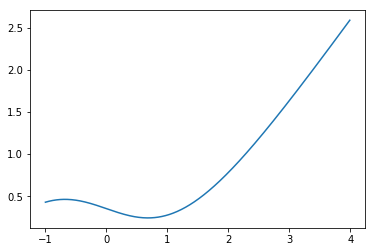

In [57]:
t = np.arange(-1.0, 4.0, 0.01)
s = np.array(list(map(f_grad, t)))

plt.plot(t, s)
plt.show()

### Generate sample and plot

In [62]:
np.random.seed(2342)
X, G, Z = ULA.ULA_with_burnin(d=dim, step=h, burn_in=10000, n=1000000,f_grad=f_grad)

expectation =  -1.1006974613395748


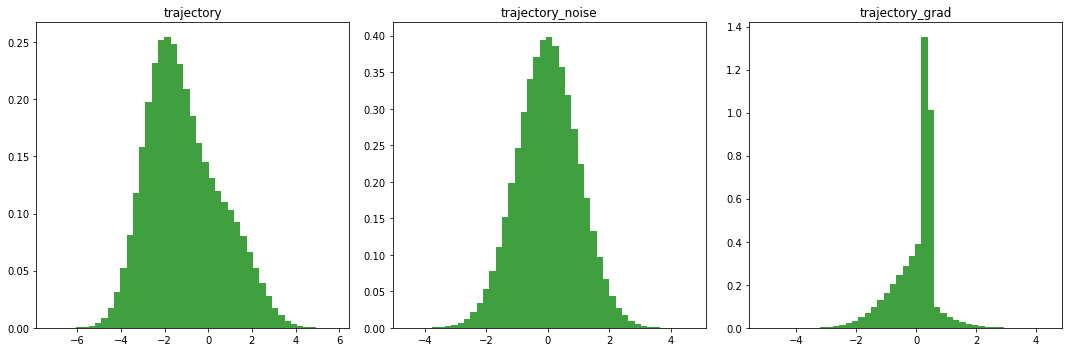

In [63]:
print ('expectation = ',local_weighted_estimator(X))
ULA.plot_distr(X,Z,G,0)

### Generate train ant test trajectories

In [65]:
np.random.seed(123)

XX, GG, ZZ = ULA.generate_train_trajectories(X, N_train=N_train,d = dim, step = h, n = n, f_grad=f_grad)
XX_test, GG_test, ZZ_test = ULA.generate_test_trajetories(N_test=N_test, d =dim, step=h, 
                                                          burn_in=10000, n = n, f_grad=f_grad)

### Algorithm 1 

In [66]:
Betas, degrees = Algo1.G_pml_fit_meansum(XX,max_deg = deg)

100%|██████████| 1000/1000 [00:01<00:00, 967.73it/s]


In [69]:
# k_comb = np.zeros((dim,dim), dtype=np.int16)
# for i in range(dim):
#     k_comb[i,i] = 1

k_comb = np.array([[1],[2]], dtype=np.int16)

### Check and time

In [73]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, n_tilde)
    print ("            (k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -0.8371909999736811
            (k = [1]) = -0.9641821796949038 [Time:6.294606686002226]
            (k = [2]) = -0.9522284149148186 [Time:30.506230846003746]


In [74]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 30)
    print ("            (k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -0.8371909999736811
            (k = [1]) = -0.9419929481726103 [Time:1.9848850979979034]
            (k = [2]) = -0.9367883336432246 [Time:9.558435576000193]


In [75]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 50)
    print ("            (k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -0.8371909999736811
            (k = [1]) = -0.9667221740547155 [Time:3.241752526999335]
            (k = [2]) = -0.959098433602743 [Time:18.03743170400412]


In [76]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 70)
    print ("            (k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -0.8371909999736811
            (k = [1]) = -0.9702616923893588 [Time:4.475468939002894]
            (k = [2]) = -0.9608532577720518 [Time:21.77474121099658]


In [77]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 150)
    print ("            (k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -0.8371909999736811
            (k = [1]) = -0.9395242632911546 [Time:9.178963024998666]
            (k = [2]) = -0.9234062588917585 [Time:44.46882098900096]


## Check results on test trajectories

In [83]:
XX_test[6].shape

(1000, 1)

In [79]:
P_test = estimator(XX_test)

M_test = np.empty((len(k_comb),P_test.shape[0]))
for i in range(len(k_comb)):
    M_test[i] = Algo1.estimator_bias(k_comb[i], XX_test, GG_test, ZZ_test, h, degrees,Betas, 70, n_jobs=8)

100%|██████████| 100/100 [00:00<00:00, 31133.49it/s]


In [93]:
np.std(XX_test[0])

1.2988557906311144

In [110]:
def ZVpolyOne(traj, traj_grad):
    n, d = traj.shape
    samples = traj.sum(axis = 1).reshape(-1,1)
    cov1 = np.var(traj_grad)
    A = 1 / cov1
    covariance = np.cov(np.concatenate((-traj_grad, samples), axis=1), rowvar=False)
    paramZV1 = -np.dot(A,covariance[:d, d:])
    ZV1 = samples - np.dot(traj_grad, paramZV1)
    mean_ZV1 = np.mean(ZV1, axis = 0)
    return mean_ZV1

In [104]:
res_zv_1 = []
for i in range (XX_test.shape[0]):
    res_zv_1.append(ZVpolyOne(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_zv_1 = np.array(res_zv_1).reshape(-1)

res_zv_2 = []
for i in range (XX_test.shape[0]):
    res_zv_2.append(ZVnbrosse.ZVpolyTwo(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_zv_2 = np.array(res_zv_2).reshape(-1)

res_cv_1 = []
for i in range (XX_test.shape[0]):
    res_cv_1.append(ZVnbrosse.CVpolyOne(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_cv_1 = np.array(res_cv_1).reshape(-1)

res_cv_2 = []
for i in range (XX_test.shape[0]):
    res_cv_2.append(ZVnbrosse.CVpolyTwo(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_cv_2 = np.array(res_cv_2).reshape(-1)

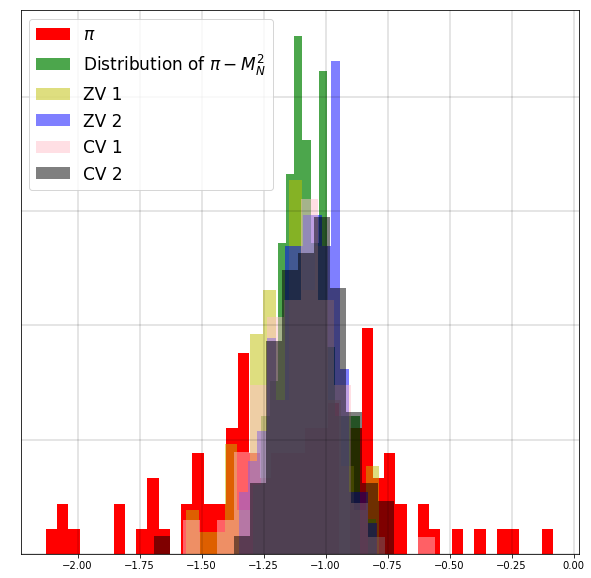

In [105]:
plt.figure(figsize=(10,10))
plt.hist(P_test,45, facecolor='r', density=True, alpha=1, label=r"$\pi$")

plt.hist((P_test-M_test.sum(axis=0)),15, density=True, facecolor='g', alpha=0.7, label="Distribution of $\pi - M^2_N$")

plt.hist(res_zv_1,15, facecolor='y', density=True, alpha=0.5, label="ZV 1")
plt.hist(res_zv_2,15, facecolor='b', density=True, alpha=0.5, label="ZV 2")
plt.hist(res_cv_1,15, facecolor='pink', density=True, alpha=0.5, label="CV 1")
plt.hist(res_cv_2,15, facecolor='black', density=True, alpha=0.5, label="CV 2")

plt.legend(loc=2, prop={'size': 17})
plt.grid(linestyle='-', linewidth=0.2, color='black')
plt.tick_params(axis='y',color = 'w', labelcolor = 'w', which='both')
# plt.xlim(-0.65, 0.65)
plt.show()

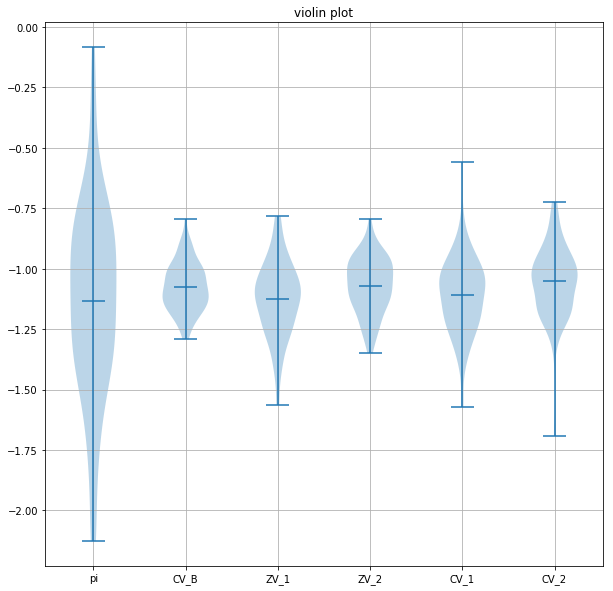

In [111]:
all_data = [P_test]
all_data.append(P_test - M_test.sum(axis = 0))
all_data.append(res_zv_1)
all_data.append(res_zv_2)
all_data.append(res_cv_1)
all_data.append(res_cv_2)
    
plt.figure(figsize=(10,10))
plt.violinplot(all_data, showmeans=True, showmedians=False)
plt.title('violin plot')
plt.xticks(np.arange(1,7), ('pi', 'CV_B', 'ZV_1', 'ZV_2', 'CV_1', 'CV_2'))
plt.grid()
plt.show()

In [112]:
print ('          Variance of Pi = ',P_test.var(ddof = 1))
for i in range(len(k_comb)):
    print ('Variance of new estimator =',(P_test-M_test[:i+1].sum(axis = 0)).var(ddof = 1))
print ('        Variance of CV 1 = ',res_cv_1.var(ddof=1))
print ('        Variance of CV 2 = ',res_cv_2.var(ddof=1))
print ('        Variance of ZV 1 = ',res_zv_1.var(ddof=1))
print ('        Variance of ZV 2 = ',res_zv_2.var(ddof=1))

          Variance of Pi =  0.15663002242908206
Variance of new estimator = 0.01084193017738896
Variance of new estimator = 0.010114334013729137
        Variance of CV 1 =  0.024671521121759618
        Variance of CV 2 =  0.020781788847065323
        Variance of ZV 1 =  0.02450987611134285
        Variance of ZV 2 =  0.013407234751320541


In [113]:
print ('VRF CVB = ',P_test.var(ddof = 1)/ (P_test - M_test.sum(axis = 0)).var(ddof=1))
print ('VRF CV1 = ',P_test.var(ddof = 1)/res_cv_1.var(ddof = 1))
print ('VRF CV2 = ',P_test.var(ddof = 1)/res_cv_2.var(ddof = 1))
print ('VRF ZV1 = ',P_test.var(ddof = 1)/res_zv_1.var(ddof = 1))
print ('VRF ZV2 = ',P_test.var(ddof = 1)/res_zv_2.var(ddof = 1))

VRF CVB =  15.48594521561908
VRF CV1 =  6.348616352274226
VRF CV2 =  7.536888358443714
VRF ZV1 =  6.39048609293442
VRF ZV2 =  11.682500182496979


In [114]:
np.save("logs/custom_1d_M_test_(K = {}, n_tilde={}).npy".format(deg, n_tilde), M_test)